In [295]:
import pandas as pd

# Exploratory Data Anlysis (EDA)

## Load data

In [296]:
df = pd.read_csv("C:/Users/Lenovo/Documents/ITB/Seleksi-GAIB/dataset/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [298]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [299]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [300]:
features= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

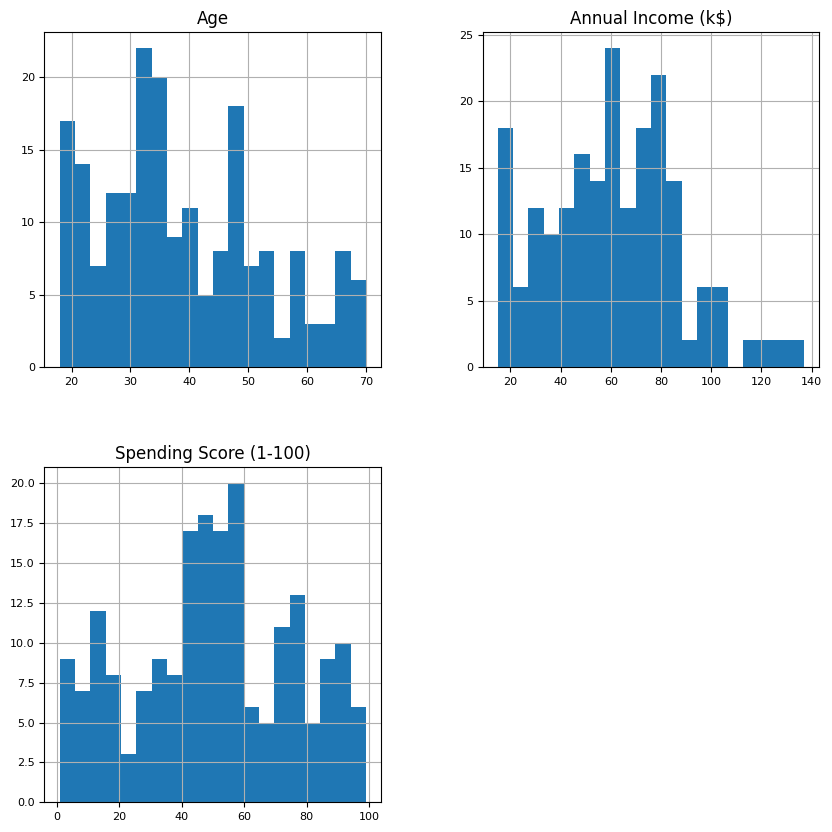

In [301]:
df[features].hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)

### Insight:
- Data terdiri dari 5 fitur dengan empat fitur numerikal dan satu fitur kategorikal,
- Untuk clustering, akan diambil fitur numerikal saja (CustomerID tidak termasuk) karena clustering akan bekerja lebih baik tanpa fitur kategorikal,
- Sebelum dikelompokkan (cluster), data dinormalisasi dulu agar algoritma clustering dapat bekerja lebih baik. 

## Data Preprocessing

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[features])
df_scaled= pd.DataFrame(df_scaled, columns=features)
df_scaled

# standardized_df = (df[features] - df[features].mean()) / df[features].std()
# standardized_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

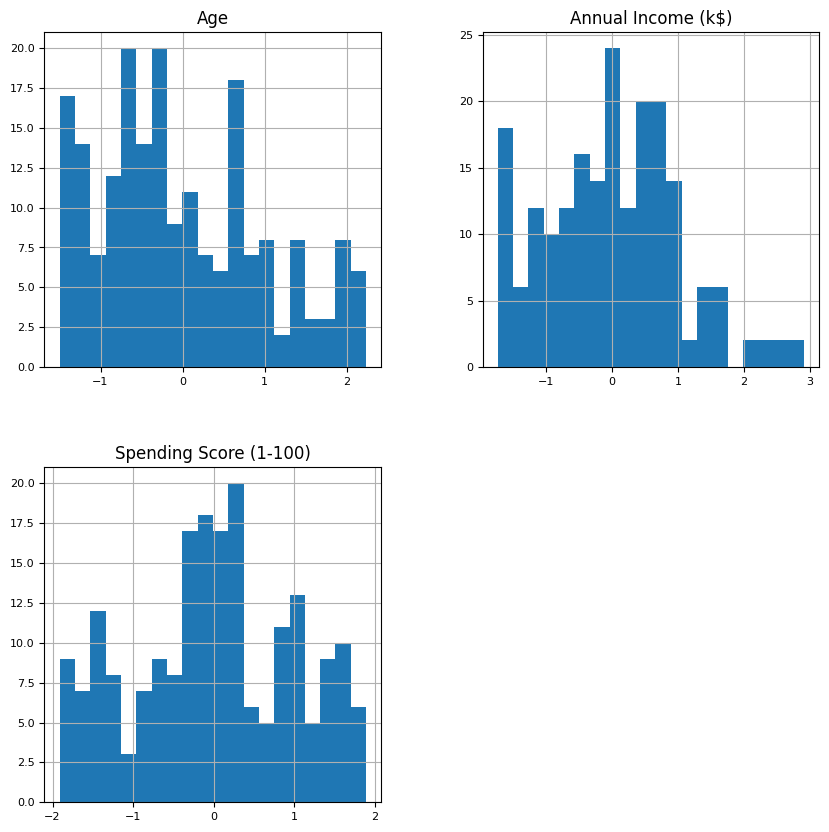

In [303]:
df_scaled[features].hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)

Kenapa harus dinormalisasi?
Karena beberapa algoritma clustering (contoh: KMeansClustering) membutuhkan data dinormalisasi agar hasilnya maksimal.

# Clustering Data

## KMeans Clustering

In [304]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

df_scaled['cluster'] = kmeans.labels_
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,4


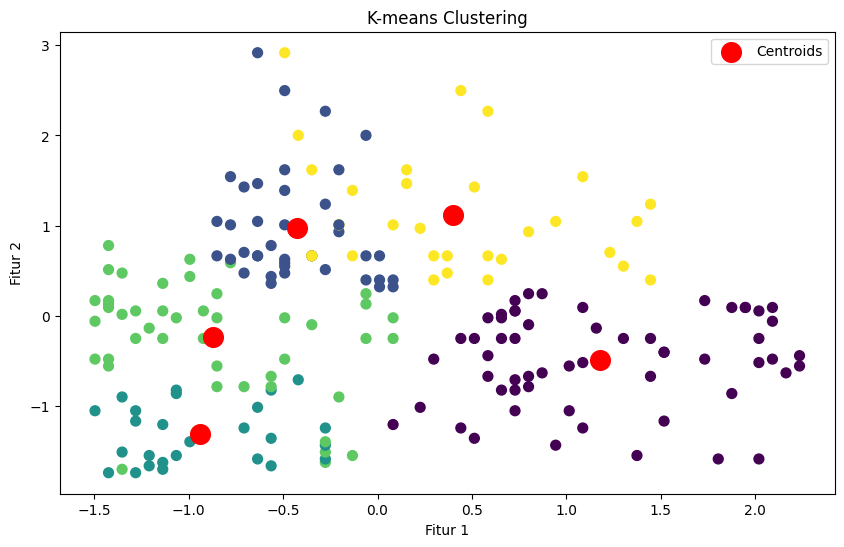

In [305]:
import matplotlib.pyplot as plt

# Plot hasil clustering
plt.figure(figsize=(10, 6))

# Plot data with the first two features and cluster as their color
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['cluster'], cmap='viridis', s=50)

# Plot centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')

# Add legend
plt.title("K-means Clustering")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()

# Show plot
plt.show()


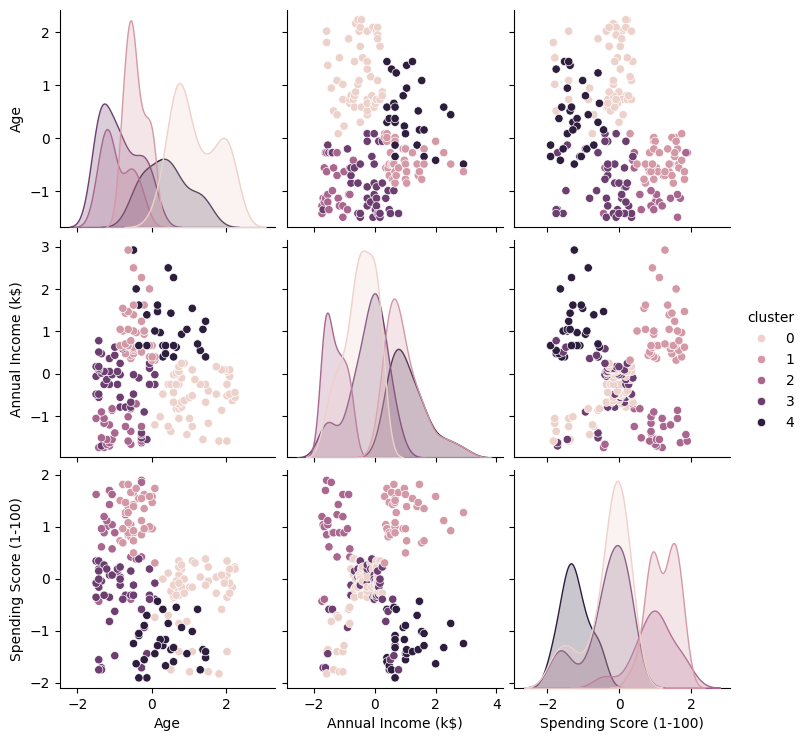

In [306]:
import seaborn as sns

# Pair plot to See the correaltion of each feature
sns.pairplot(df_scaled, hue='cluster', diag_kind='kde')
plt.show()

In [307]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, init='random'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.init = init

    def initialize_centroids(self, X):
        if self.init == 'random':
            indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            return X[indices]
        elif self.init == 'kmeans++':
            centroids = [X[np.random.choice(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                dist_sq = np.min([np.sum((X - centroid) ** 2, axis=1) for centroid in centroids], axis=0)
                probs = dist_sq / np.sum(dist_sq)
                next_centroid = X[np.random.choice(X.shape[0], p=probs)]
                centroids.append(next_centroid)
            return np.array(centroids)
        else:
            raise ValueError("Unknown initialization method")

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        return self.labels_

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


In [308]:
# from unsupervised_learning.kmeans_clustering import KMeans

kmeans = KMeans(n_clusters=5, max_iter=300)

df_scaled['cluster'] = kmeans.fit(df_scaled.values)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,4
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,4
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,3


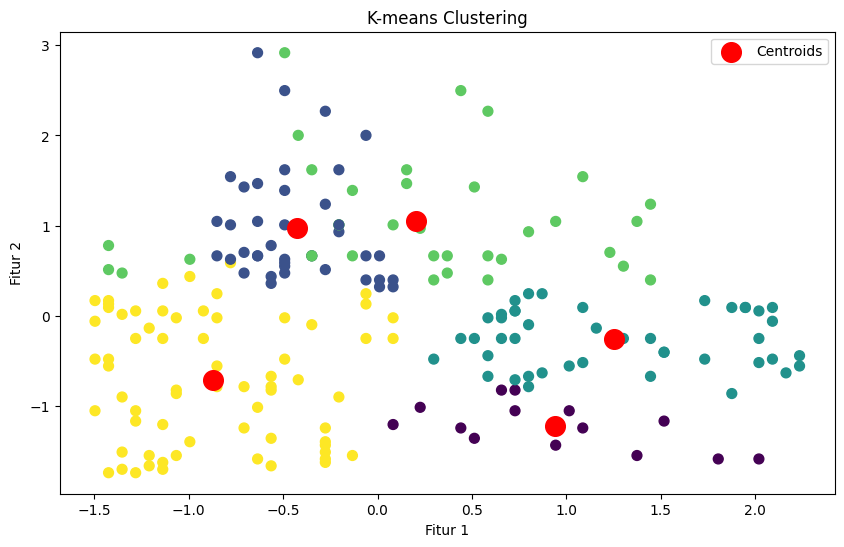

In [309]:
import matplotlib.pyplot as plt

# Plot hasil clustering
plt.figure(figsize=(10, 6))

# Plot data dengan dua fitur pertama dan fitur cluster untuk warna
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['cluster'], cmap='viridis', s=50)

# Plot centroid
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', label='Centroids')

# Tambahkan judul dan legenda
plt.title("K-means Clustering")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()

# Tampilkan plot
plt.show()

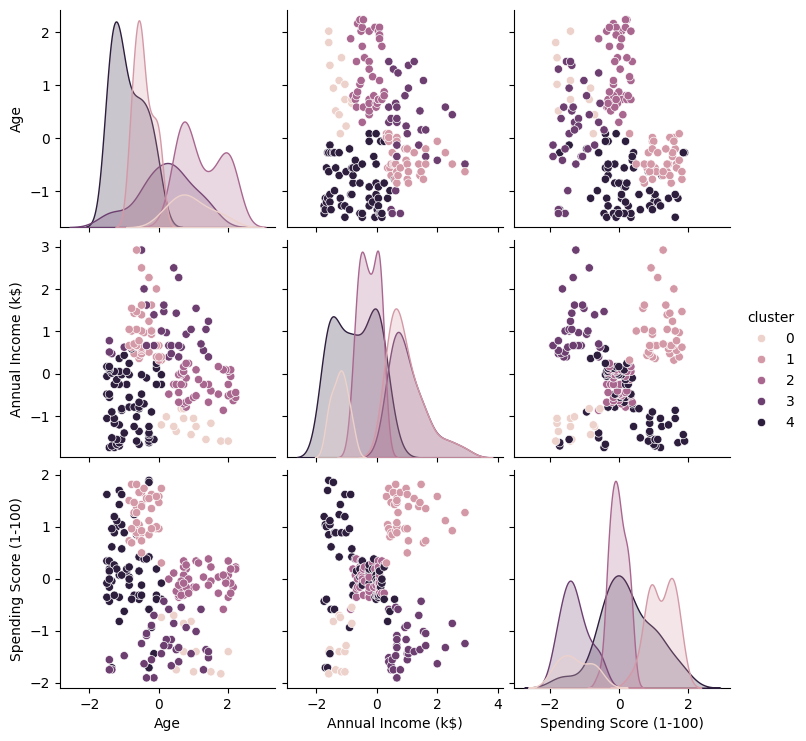

In [310]:
sns.pairplot(df_scaled, hue='cluster', diag_kind='kde')
plt.show()

## DBSCAN

In [311]:
from sklearn.cluster import DBSCAN

In [312]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['cluster'] = dbscan.fit_predict(df_scaled.values)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,-1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


In [313]:
df_scaled['cluster'].value_counts()

cluster
-1    68
 1    43
 4    32
 2    29
 0    17
 5     7
 3     4
Name: count, dtype: int64

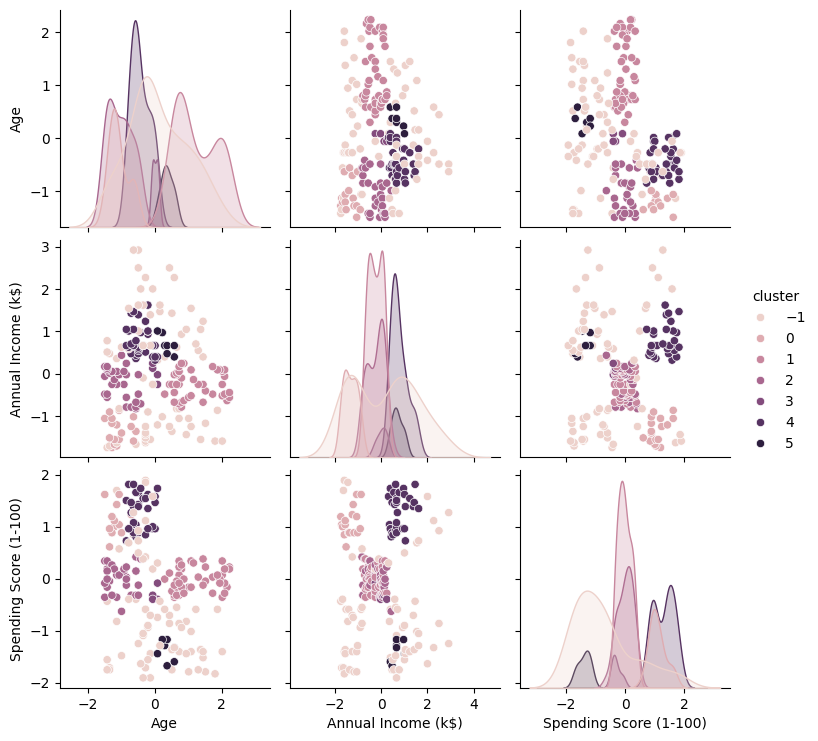

In [314]:
sns.pairplot(df_scaled, hue='cluster', diag_kind='kde')
plt.show()

In [315]:
from unsupervised_learning.dbscan import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

df_scaled['cluster'] = dbscan.fit(df_scaled.values)

df_scaled['cluster'].value_counts()

cluster
-1     78
 19    10
 7      7
 14     7
 1      6
 21     6
 4      6
 5      6
 6      6
 8      6
 22     6
 11     6
 13     6
 2      5
 0      5
 23     4
 25     4
 10     4
 9      4
 3      4
 15     3
 20     3
 24     3
 18     2
 16     1
 17     1
 12     1
Name: count, dtype: int64

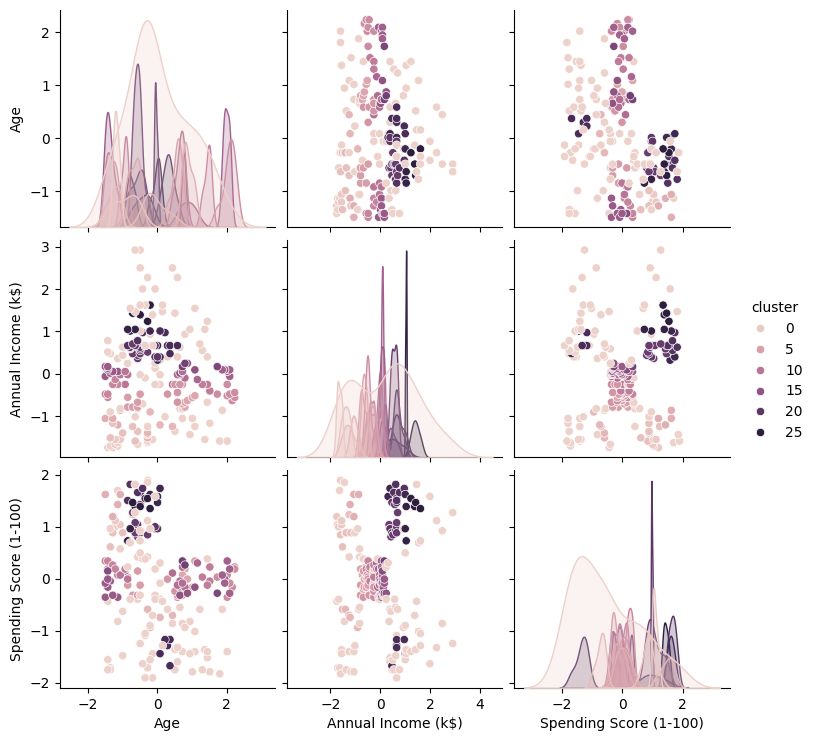

In [316]:
sns.pairplot(df_scaled, hue='cluster', diag_kind='kde')
plt.show()